<a href="https://colab.research.google.com/github/powersurge8891/Data-Segmentation/blob/main/Classification_of_countries_using_Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and Data

In [1]:
%cd/content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model


/content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dataset= data.drop(columns='country')

#Optimum number of clusters

In [5]:
#Akaike's Information Criterion and Bayelsian Information Criterion

In [6]:
#seeking the best cluster to use
components= np.arange(1,10)
model= [GaussianMixture(n, random_state=2).fit(dataset)

for n in components]

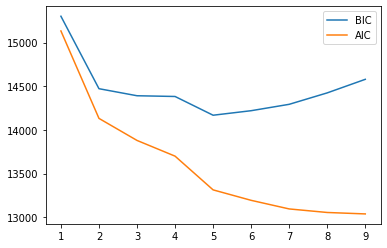

In [7]:
plt.plot(components, [m.bic(dataset) for m in model], label='BIC')
plt.plot(components, [m.aic(dataset) for m in model], label='AIC')
plt.legend()

#Gaussian Model

In [13]:
#GMM
my_model=GaussianMixture(4, random_state=2).fit(dataset)

In [14]:
data['classes']=my_model.predict(dataset)

In [26]:
data.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,classes
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,2
125,Russia,10.0,29.2,5.08,21.1,23100,14.20,69.2,1.57,10700,3
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,0
35,Colombia,18.6,15.9,7.59,17.8,10900,3.86,76.4,2.01,6250,3
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,1


In [49]:
data.loc[data['classes']==3].sample(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,classes
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860,3
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000,3


In [50]:
#probability of belonging to a group
prob_classes=pd.DataFrame(my_model.predict_proba(dataset).round(3))

In [52]:
data_prob=pd.concat([data, prob_classes], axis
          =1)

In [55]:
data_prob.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,classes,0,1,2,3
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,1,0.0,1.000,0.0,0.000
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,1,0.0,0.855,0.0,0.145
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.60,1350,1,0.0,1.000,0.0,0.000
52,Fiji,24.1,57.8,4.86,63.9,7350,4.23,65.3,2.67,3650,1,0.0,1.000,0.0,0.000
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1,0.0,1.000,0.0,0.000
